<h1 style="font-family:verdana;"> <center>📚 𝓟𝓯𝓲𝔃𝓮𝓻 𝓢𝓮𝓷𝓽𝓲𝓶𝓮𝓷𝓽 𝓐𝓷𝓪𝓵𝔂𝓼𝓲𝓼 📚</center> </h1>

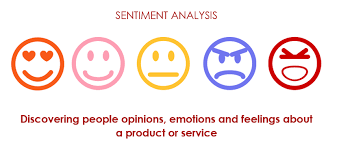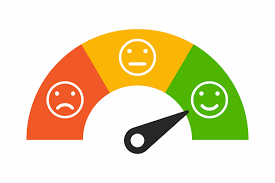

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬  In this last decade, the use of social networks became ubiquitous in our daily life. Twitter, one of the famous social networks became a rich source of discussed topics. The users in Twitter express their sentiments or points of view by tweets concerning different topics in variety of fields, such as politics, commercial products, etc.Finally, I would liked to explore this dataset with Kmeans,Vader and Textblob 😃</p></blockquote>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing The Packages</center>
</h1>
</div>

In [29]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import pandas as pd
import nltk
import textblob
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
import plotly
plotly.offline.init_notebook_mode (connected = True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing The Data</center>
</h1>
</div>

In [30]:
data=pd.read_csv('../input/pfizer-vaccine-tweets/vaccination_tweets.csv')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Having A Look At The Data</center>
</h1>
</div>

In [31]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Preprocessing The Data</center>
</h1>
</div>

In [32]:
# Proprocessing the data
data['text']=data['text'].str.lower()
# Code to remove the Hashtags from the text
data['text']=data['text'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
data['text']=data['text'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
data['text']=data['text'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
data['text']=data['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
data['text']=data['text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
data['text']=data['text'].apply(lambda x:re.sub('@[^\s]+','',x))



In [33]:
data=data[['text']]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Vader Sentiment Analysis</center>
</h1>
</div>

![](https://thumbs.gfycat.com/FakeKindIrukandjijellyfish-max-1mb.gif)

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Vader ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
</div>


<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ How does vader work ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. In this approach, each of the words in the lexicon is rated as to whether it is positive or negative, and in many cases, how positive or negative it is .
</div>


<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is polarity in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.
</div>


<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Compound Score in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
</div>


In [34]:
# Invoking the TFIDFVectorizer
tf_data=TfidfVectorizer()

# Copying the data into a new dataframe called vader
vader=data.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in vader['text'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment']=t

In [35]:
# Having a look at the vader datafram
vader.head()


,text,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
0,same folks said daikon paste could treatcytoki...,0.000,0.000,1.000,0.0000,Neutral
1,while the world has been on the wrong side of ...,0.125,0.109,0.766,-0.1027,Negative
2,russian vaccine is created to last 2 4 years,0.000,0.250,0.750,0.2500,Positive
3,facts are immutable senator even when you re n...,0.000,0.000,1.000,0.0000,Neutral
4,explain to me again why we needvaccine borisjo...,0.000,0.000,1.000,0.0000,Neutral


In [36]:
fig=px.histogram(data_frame=vader,x='Compound Score',color='Overall Sentiment',template='plotly')
fig.show()

<div class="alert alert-block alert-info" style="font-size:18px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;Well we can see from the above plot that most of the positive sentences have a compund score of 0.5 and most of the negative sentences have a compound score of 0.3 
</div>

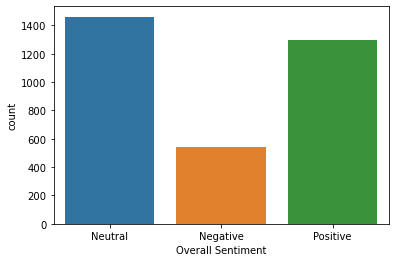

In [37]:
sns.countplot(vader['Overall Sentiment'])

In [38]:
print('The text is :',vader['text'][6])
print('The vader sentiment Score of the data is :')
vader.iloc[6,1:]

The text is : it isbit sad to claim the fame for success of on patriotic competition between usa canada uk and
The vader sentiment Score of the data is :


Negative Score          0.126
Positive Score          0.267
Neutral Score           0.607
Compound Score         0.5423
Overall Sentiment    Positive
Name: 6, dtype: object

In [39]:
print('The text is :',vader['text'][30])
print('The vader sentiment Score of the data is :')
vader.iloc[30,1:]

The text is : zubymusic 6 deaths so far itonly death nothing to worry about then
The vader sentiment Score of the data is :


Negative Score          0.267
Positive Score          0.155
Neutral Score           0.578
Compound Score        -0.4133
Overall Sentiment    Negative
Name: 30, dtype: object

In [40]:
vader_data=tf_data.fit_transform(vader['text'].values)

In [41]:
pca = PCA(n_components=3).fit_transform(vader_data.todense())

In [42]:
px.scatter_3d(x=pca[:,0],y=pca[:,1],z=pca[:,2],color=vader['Overall Sentiment'].values)

<div class="alert alert-block alert-info" style="font-size:18px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The Clusters of the vectors is not so good but we can still see the 3 different clusters in this figure .
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ When and where to use Vader ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;Vader is optimized for social media data and can yield good results when used with data from twitter, facebook, etc..
</div>


<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ Drawback Of Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The main drawback with the rule-based approach for sentiment analysis is that the method only cares about individual words and completely ignores the context in which it is used.

For example, “the party was savage” will be negative when considered by any token-based algorithms..
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>TextBlob Sentiment Analysis</center>
</h1>
</div>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyWAhKLBsD_u6MQeM8l41OW5DqKiZ-XqMvUg&usqp=CAU)

<blockquote><h1 style=" color:#A714D8; font-family:verdana;">🕵️ What is TextBlob ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.
    
<br>TextBlob is built upon the NLTK architecture and is much easier to use and faster for Beginners
</div>


<blockquote><h1 style=" color:#A714D8; font-family:verdana;">🕵️ What are the features of TextBlob ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;Some of the Features of TextBlob includes:<br>
    <br>
<ul>
<li>Sentiment analysis</li>
    <li>Noun phrase extraction</li>
    <li>Part-of-speech tagging</li>
   <li> Tokenization (splitting text into words and sentences)</li></ul>
</div>


<blockquote><h1 style=" color:#A714D8; font-family:verdana;">🕵️ What is Polarity in Textblob ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;It simply means polarity of the emotions expressed in a sentence.
    <br>
    Emotions are closely related to sentiments. The strength of a sentiment or opinion is typically linked to the intensity of certain emotions, e.g., happy or being sad .
    <br>
    The range of the Polarity lies in [-1.0,1.0] where 1 is a positive statment and -1 is negative statement. Values with 0 is Neutral statment
</div>


<blockquote><h1 style=" color:#A714D8; font-family:verdana;">🕵️ What is subjectivity in Textblob ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;Emotions are closely related to sentiments. The strength of a sentiment or opinion is typically linked to the intensity of certain emotions, e.g., happy or being sad .
    
    
</div>


In [43]:
# Copying the data into new dataframe called textblob_data
textblob_data=data.copy()
# Creating additional columns containing polarity score , subjectivity and overall sentiment 
sentiment=[]
subjectivity=[]
sentiment_score=[]
for i in textblob_data['text'].values:
    Tweet = textblob.TextBlob(i)
    sentiment_score.append(Tweet.sentiment[0])
    if Tweet.sentiment[0]<0:
        sentiment.append('Negative')
    elif Tweet.sentiment[0]>0:
        sentiment.append('Positive')
    else:
        sentiment.append('Neutral')
    subjectivity.append(Tweet.sentiment[1])

In [44]:
textblob_data['Sentiment Score']=sentiment_score
textblob_data['Subjectivity']=subjectivity
textblob_data['Overall Sentiment']=sentiment

In [45]:
textblob_data.head()

,text,Sentiment Score,Subjectivity,Overall Sentiment
0,same folks said daikon paste could treatcytoki...,0.00,0.125000,Neutral
1,while the world has been on the wrong side of ...,-0.50,0.900000,Negative
2,russian vaccine is created to last 2 4 years,0.00,0.033333,Neutral
3,facts are immutable senator even when you re n...,-0.05,0.550000,Negative
4,explain to me again why we needvaccine borisjo...,0.00,0.000000,Neutral


In [46]:
px.histogram(data_frame=textblob_data,x='Sentiment Score',color='Overall Sentiment')

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The sentiment score of the positive sentences lies between 0.1 - 0.25 the most in this dataset and the sentiment score of the negative sentences lies from 0 to -0.2 the most using TextBlob
</div>

In [47]:
px.histogram(data_frame=textblob_data,x='Subjectivity',color='Overall Sentiment')

<div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The Subjectivity distribution of the sentences shows the highest density for positive sentences when it's value is 0.5 and 0.4 when it's negative.
</div>

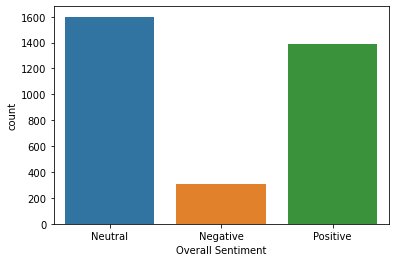

In [48]:
sns.countplot(textblob_data['Overall Sentiment'])

<blockquote><h1 style=" color:#A714D8; font-family:verdana;">🕵️ Difference between vader and textblob from the figures ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;Well we see that the negative Sentiment tweet count has gone down and the positive tweet count is considerably higher than the one vader model gave us
</div>


In [49]:
print('The sentence is :',textblob_data['text'][6])
textblob_data.iloc[6,1:]

The sentence is : it isbit sad to claim the fame for success of on patriotic competition between usa canada uk and


Sentiment Score          -0.1
Subjectivity              0.5
Overall Sentiment    Negative
Name: 6, dtype: object

In [50]:
print('The sentence is :',textblob_data['text'][30])
textblob_data.iloc[30,1:]

The sentence is : zubymusic 6 deaths so far itonly death nothing to worry about then


Sentiment Score           0.1
Subjectivity                1
Overall Sentiment    Positive
Name: 30, dtype: object

In [51]:
textblob_vec=tf_data.fit_transform(textblob_data['text'].values)

In [52]:
pca2 = PCA(n_components=3).fit_transform(textblob_vec.todense())

In [53]:
px.scatter_3d(x=pca2[:,0],y=pca2[:,1],z=pca2[:,2],color=textblob_data['Overall Sentiment'].values)

<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">💬  Textblob will ignore the words that it doesn’t know, it will consider words and phrases that it can assign polarity to and averages to get the final score. 😃</p></blockquote>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>K-Means Unsupervised Sentiment Analysis</center>
</h1>
</div>

<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">💬  For K means clustering we might need to tokenize and lemmatize the text  </p></blockquote>


In [54]:
# Making the copy of th data
km=data.copy()

def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w.lower()) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

In [55]:
rem_stopwords_tokenize(km,'text')
lemmatize_all(km,'text')

km['text']=km['text'].apply(lambda x:' '.join([i+' ' for i in x]))
# Removing double spaces if created
km['text']=km['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


<blockquote><p style="font-size:20px; color:#159364; font-family:verdana;">💬  Converting the text into vectors using TdidfVectorizer </p></blockquote>


In [56]:
# Tfidf Vectorizer
tf=TfidfVectorizer()
# Fit transform the data
X=tf.fit_transform(km['text'].values)

In [57]:
for i, feature in enumerate(tf.get_feature_names()[:10]):
    print(i, feature)

0 00
1 000
2 01
3 02
4 044
5 05
6 050
7 052
8 073
9 08


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Choosing The Optimal Clusters</center>
</h1>
</div>

![](https://www.vertica.com/wp-content/uploads/2019/10/Data_Clustering_269630632-2000px.jpg)

<blockquote><h1 style=" color:#C70039; font-family:verdana;">🕵️ What is clustering and what is the approach that we used here ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;Clustering is an unsupervised operation, and KMeans requires that we specify the number of clusters. One simple approach is to plot the SSE for a range of cluster sizes. We look for the "elbow" where the SSE begins to level off. MiniBatchKMeans introduces some noise so I raised the batch and init sizes higher. Unfortunately the regular Kmeans implementation is too slow. You'll notice different random states will generate different charts. Here I chose 4 clusters
</div>


<blockquote><h1 style=" color:#C70039; font-family:verdana;">🕵️ What is SSE?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;SSE is defined as the sum of the squared distance between centroid and each member of the cluster. Then plot a K against SSE graph. We will observe that as K increases SSE decreases as disortation will be small. So the idea of this algorithm is to choose the value of K at which the graph decrease abruptly.
</div>


In [58]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=256, batch_size=512, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


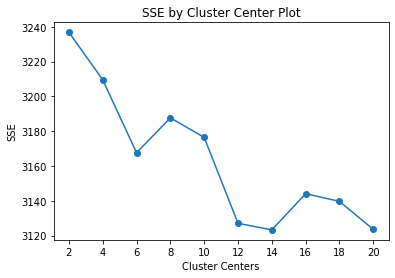

In [59]:
find_optimal_clusters(X, 20)


In [60]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Plotting The Clusters</center>
</h1>
</div>


<blockquote><p style="font-size:20px; color:#C70039; font-family:verdana;">💬  
Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 320 points. </p></blockquote>


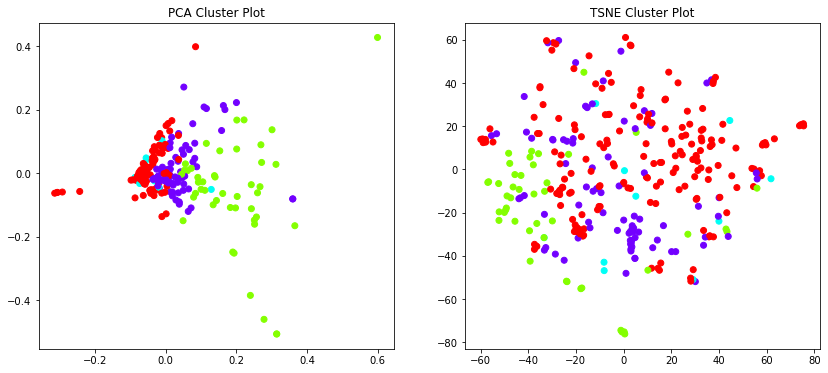

In [61]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)+1
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=320, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

<blockquote><p style="font-size:20px; color:#C70039; font-family:verdana;">💬  
This is what we built on 4 clusters which was efficient now let's form on 3 clusters (Positive, Negative and Neutral)</p></blockquote>



In [99]:
clusters = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

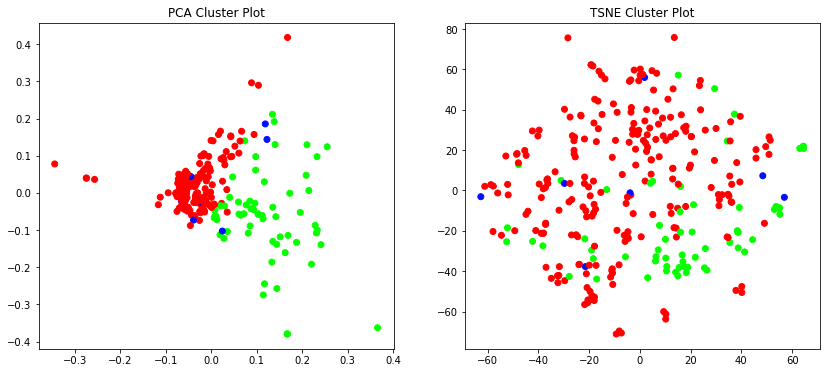

In [100]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)+1
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Top Keywords</center>
</h1>
</div>


<blockquote><p style="font-size:20px; color:#C70039; font-family:verdana;">💬  
Lastly, we'll cycle through the clusters and print out the top keywords based on their TFIDF score to see if we can spot any trends. I'll do this by computing an average value across all dimensions in Pandas, grouped by the cluster label. Using numpy, finding the top words is simply sorting the average values for each row, and taking the top N.
</p></blockquote>




In [101]:
# Function  to get the top keywords
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X, clusters, tf.get_feature_names(), 10)


Cluster 0
people,vaccination,day,amp,today,get,vaccinated,first,dose,vaccine

Cluster 1
coronavirus,use,today,dose,biontech,first,19,pfizer,covid,vaccine

Cluster 2
covid,worker,first,organization,world,minister,emergency,vaccine,given,health


In [139]:
# Making a classes column and putting the values there
km['Classes']=clusters
# Having a look at the data
km[km['Classes']==2].head()

,text,Classes
12,agency also released new information health ca...,2
54,told world health organization intend import c...,2
77,farandwide erinotoole erintoolehand picked hea...,2
86,ohaoregon legacy health first registered covid...,2
105,hospitalwork received vaccine iv room made fir...,2


In [140]:
km[km['Classes']==0].head()

,text,Classes
0,folk said daikon paste could treatcytokine storm,0
1,world wrong side history year hopefully big va...,0
2,russian vaccine created last 2 4 year,0
3,fact immutable senator even ethically sturdy e...,0
4,explain needvaccine borisjohnson matthancock,0


In [141]:
km[km['Classes']==1].head()

,text,Classes
5,anyone useful advice guidance whether covid va...,1
8,covid vaccine getting,1
23,u food drug administration fda granted emergen...,1
29,covid 19 belong,1
34,vaccine anyone,1


In [142]:
km['Classes'].replace({1:'Positive',0:'Negative',2:'Neutral'},inplace=True)

In [143]:
kmeans_vector=tf.fit_transform(km['text'].values)
pca3 = PCA(n_components=3).fit_transform(kmeans_vector.todense())
px.scatter_3d(x=pca3[:,0],y=pca3[:,1],z=pca3[:,2],color=km['Classes'].values)

<blockquote><p style="font-size:20px; color:#D93066   ; font-family:verdana;">💬  
Well the clusters look pretty good using Mini Batch but are they really the best ??
</p></blockquote>




<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>𝕿𝖍𝖆𝖓𝖐 𝖄𝖔𝖚</center>
</h1>
</div>

![](https://media.tenor.com/images/ba3ec917b6414b01fa85d33979336864/tenor.gif)